<a href="https://colab.research.google.com/github/mhyls26/CCADMACL_EXERCISES/blob/main/Exercise_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [334]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [335]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [336]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [337]:
print ("Shape: ", df.shape)

Shape:  (200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [338]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [339]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [340]:
df_cluster = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [341]:
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

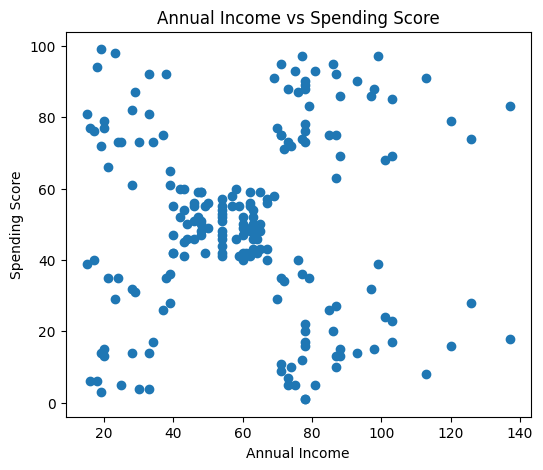

In [342]:
plt.figure(figsize=(6, 5))
plt.scatter(df_cluster['AnnualIncome'], df_cluster['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

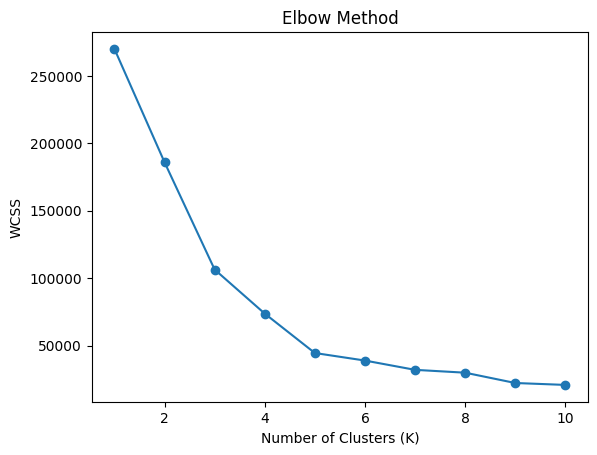

In [343]:
wcss = []
for k in range(1, 11):
   km = KMeans(n_clusters=k, random_state=0)
   km.fit(df_cluster)
   wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [344]:
k_optimal = 5
km = KMeans(n_clusters=k_optimal, random_state=0)
df_cluster['Cluster'] = km.fit_predict(df_cluster)
df_cluster.head(10)

/tmp/ipython-input-1255247449.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AnnualIncome,SpendingScore,Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
5,17,76,4
6,18,6,3
7,18,94,4
8,19,3,3
9,19,72,4


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

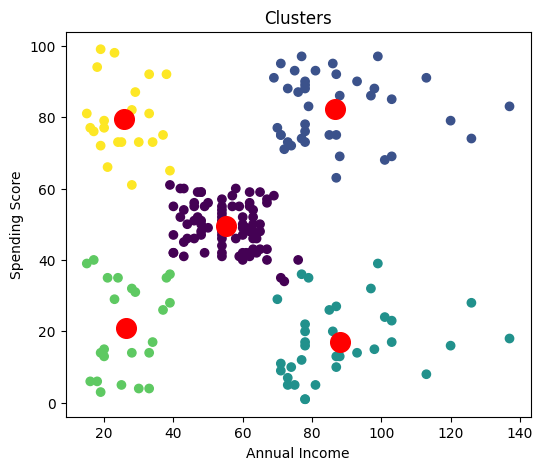

In [345]:
plt.figure(figsize=(6,5))
plt.scatter(df_cluster['AnnualIncome'], df_cluster['SpendingScore'], c=df_cluster['Cluster'])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

**High income, low spending customers:**
- The teal cluster on the right side of the plot.


**Low income, high spending customers:**
- The yellow cluster on the left upper area of the plot.


**Target customers for promotions:**
- The purple cluster in the middle (moderate income, moderate spending).


**Business insights derived from the clusters:**
1.  High-income low-spending customers may need better engagement or targeted marketing.
2. Low-income high-spending customers are loyal and respond well to discounts and bundles.
3. Moderate-income moderate-spending customers are ideal for promotional campaigns.
4. High-income high-spending customers can be offered premium products and VIP programs.



## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [346]:
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

Visualize using a 3D scatter plot. `(5 pts)`

In [347]:
cluster_Kmeans = KMeans(n_clusters=5)

model_kmeans = cluster_Kmeans.fit(X)

pred_kmeans = model_kmeans.labels_

fig = px.scatter_3d(
    df, x='Age', y='AnnualIncome', z='SpendingScore', color =pred_kmeans, title='3D Model')
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

**Are there meaningful and distinguishable clusters?**

*Yes. The customers form clear groups based on age, income, and spending. Each cluster is separated and shows different behavior patterns.*

**What business insights can you derive from the clusters in 3D?**

1. Younger customers with higher spending can be good targets for promotions.
2. Older or high-income customers with low spending may need different marketing strategies.
3. Mid-age, mid-income groups show balanced behavior and may respond well to discounts.
4. 3D view helps see how age affects spending together with income.